<a href="https://colab.research.google.com/github/avis176/Analytics-Vidhya-Hackathons/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.simplefilter('ignore')
pd.set_option("display.max_columns",None)
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG (1).csv
Saving train_ctrUa4K.csv to train_ctrUa4K (1).csv


#**Import Data set**

In [ ]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

#**Data Exploration**

In [ ]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Check for duplicates:**

In [ ]:
duplicates = train[train.duplicated('Loan_ID')]
duplicates

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


**Dimension of the Data**

In [ ]:
print(f'\nTrain contains {train.shape[0]} observations and {train.shape[1]} features')
print(f'\nTest contains {test.shape[0]} observations and {test.shape[1]} features')


Train contains 614 observations and 13 features

Test contains 367 observations and 12 features


**variables names**

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Variable data types**

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Missing values**

In [ ]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

**Unique values in each variable**

In [ ]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Target Distribution**

In [ ]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

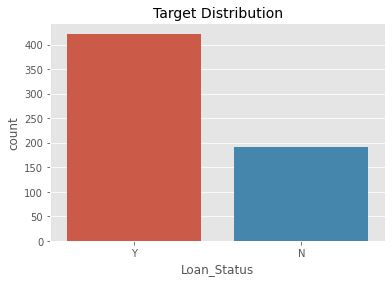

In [ ]:
_=sns.countplot(train['Loan_Status'])

_=plt.title('Target Distribution',fontsize=14)

Data is not imbalanced as the ratio is 68% and 32% .

**Segregating Data into numerical and categorical**

In [ ]:
categorical = [col for col in train.columns if train[col].dtypes=='object']
print(categorical)
cat_df = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
print(cat_df)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [ ]:
numerical = [col for col in train.columns if train[col].dtypes != 'object']
print(numerical)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
num_df =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

discrete_df = ['Credit_History']

**Univariate Plot for Categorical variables**

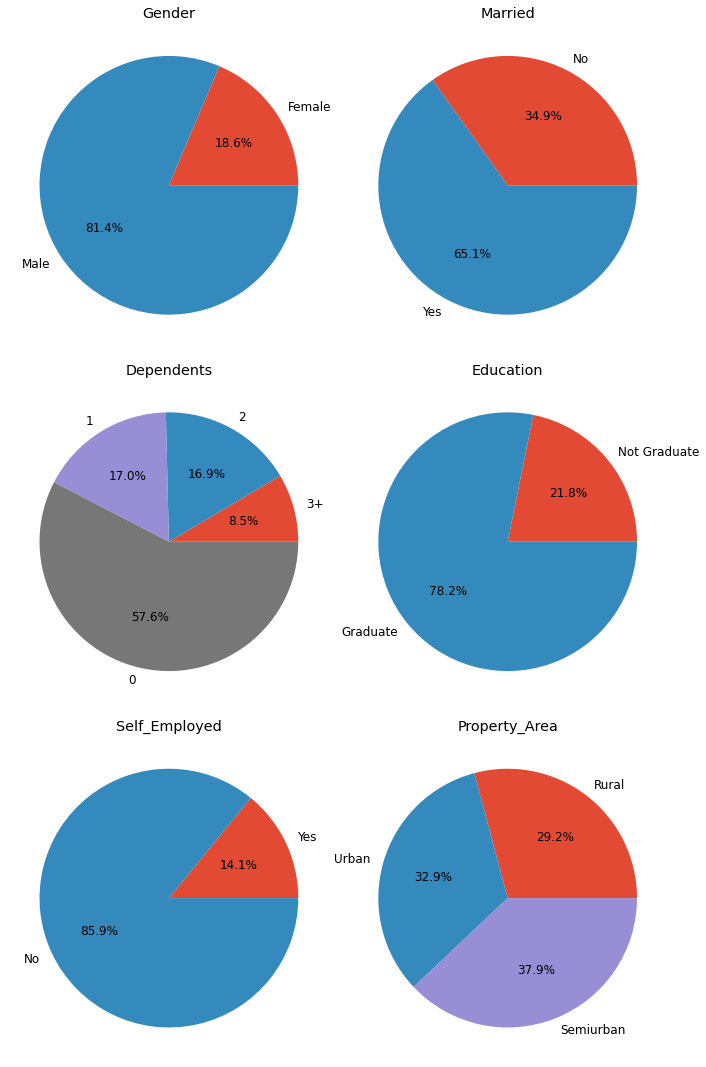

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10,15))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_df]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%1.1f%%', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

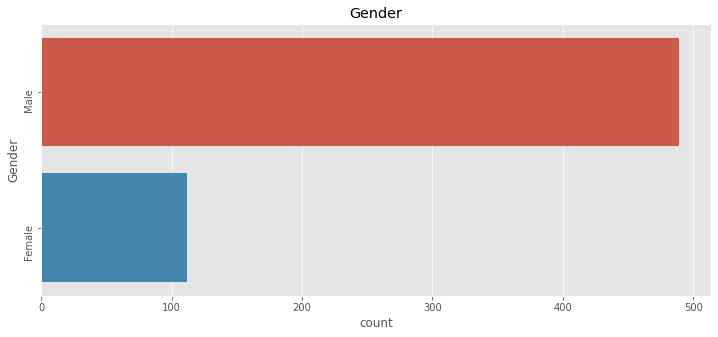

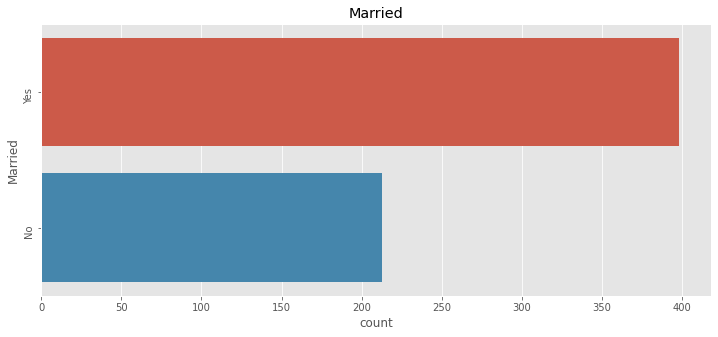

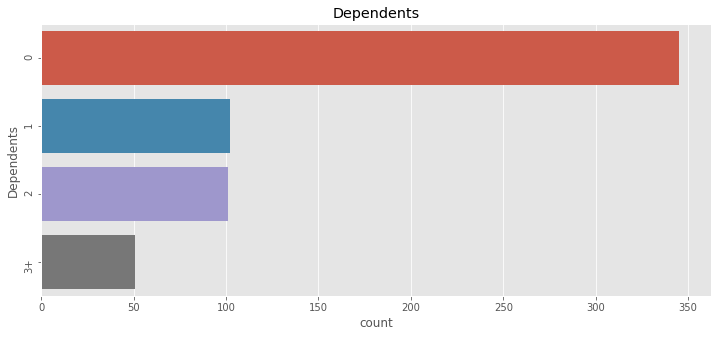

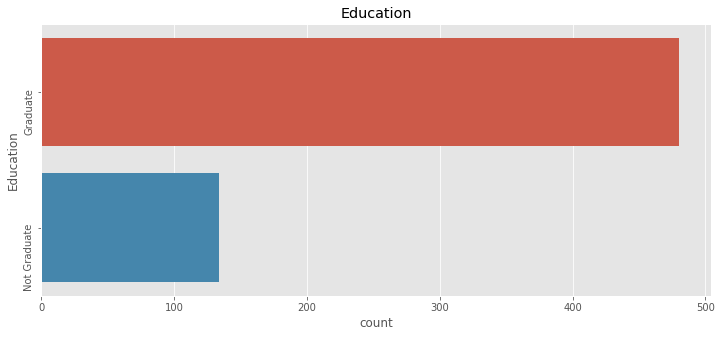

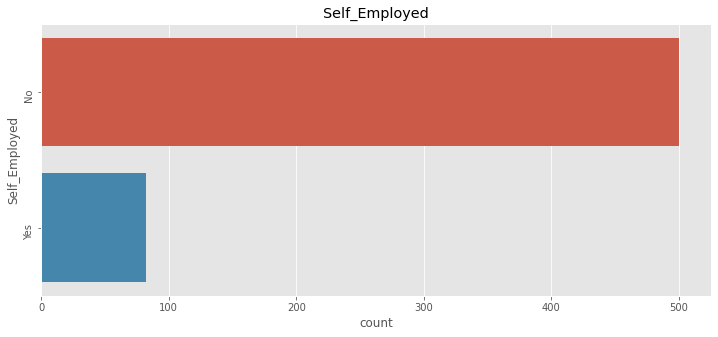

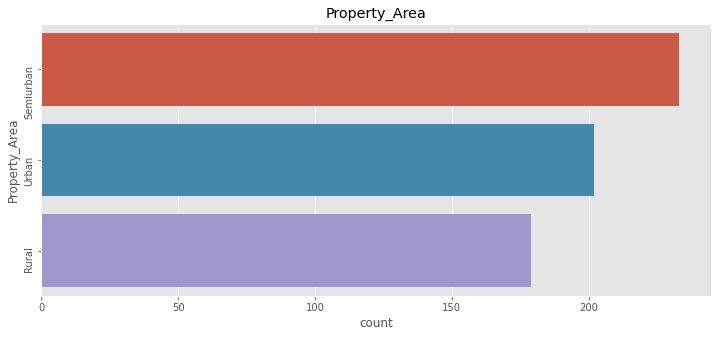

In [ ]:
for feature in cat_df:
  df = train.copy()
  plt.figure(figsize=(12,5))
  sns.countplot(y=df[feature],orient="h",order=df[feature].value_counts().index)
  plt.title(feature)
  plt.yticks(rotation=90)
  plt.show()


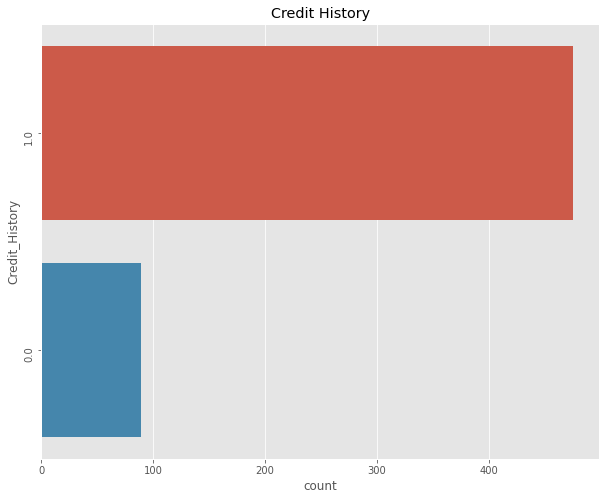

In [ ]:
for feature in discrete_df:
  plt.figure(figsize=(10,8))
  df = train.copy()
  sns.countplot(y=df[feature],order=df[feature].value_counts().index)
  plt.title('Credit History')
  plt.yticks(rotation=90)
  plt.show()

**Univariate plot for Continuous variable**

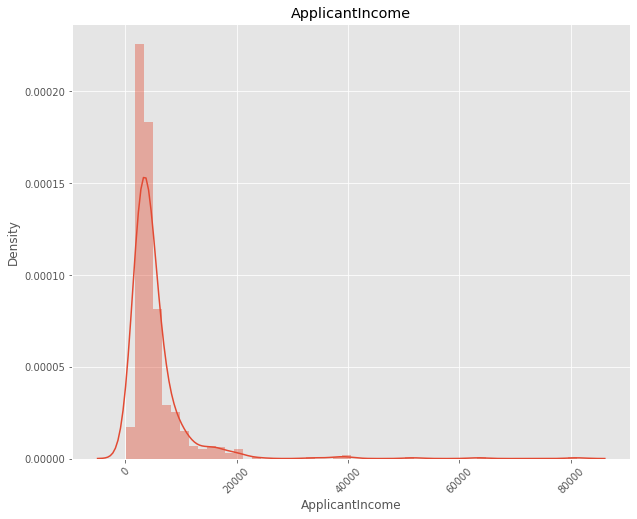

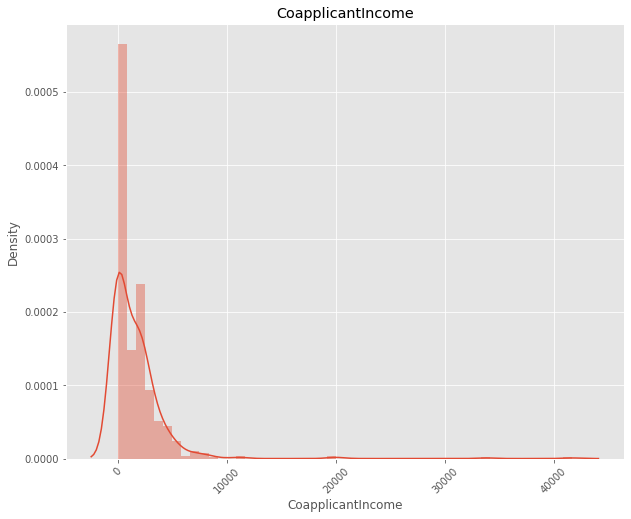

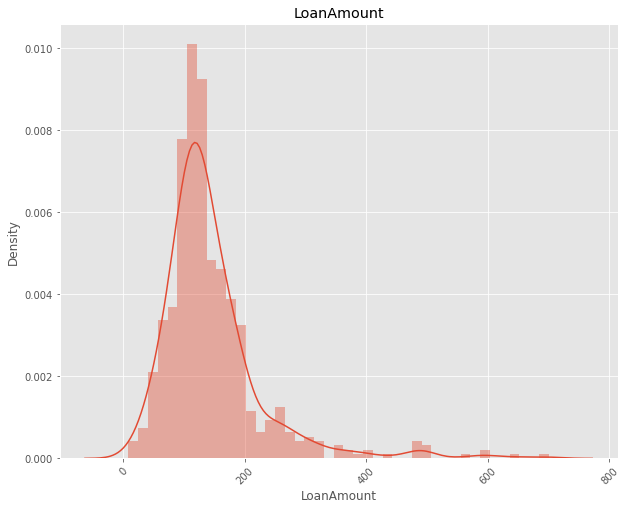

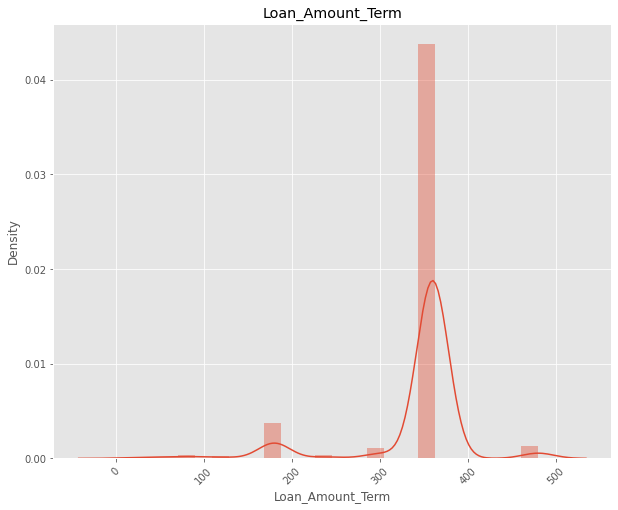

In [ ]:
for feature in num_df:
  df=train.copy()
  plt.figure(figsize=(10,8))
  sns.distplot(df[feature],kde=True)
  plt.title(feature)
  plt.xticks(rotation=45)
  plt.show()

Applicant Amount,co-applicant amount,loan amount are right skewed distribution.So,apply log transformation in each variable.

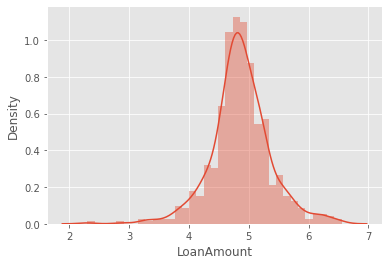

In [ ]:
sns.distplot(np.log1p(df['LoanAmount']))

**Bi-Variate Analysis for categorical variable with dependent variable:**

In [ ]:
new=df.groupby('Property_Area')['Loan_Status'].count()*100/len(df)
new

Property_Area
Rural        29.153094
Semiurban    37.947883
Urban        32.899023
Name: Loan_Status, dtype: float64

In [ ]:
print(new.index)
print(new.values)

Index(['Rural', 'Semiurban', 'Urban'], dtype='object', name='Property_Area')
[29.15309446 37.94788274 32.8990228 ]


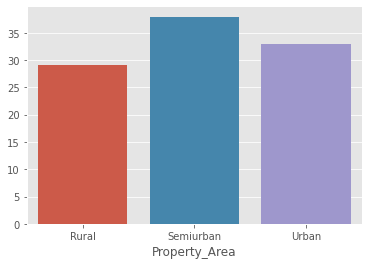

In [ ]:
sns.barplot(x=new.index,y=new.values)

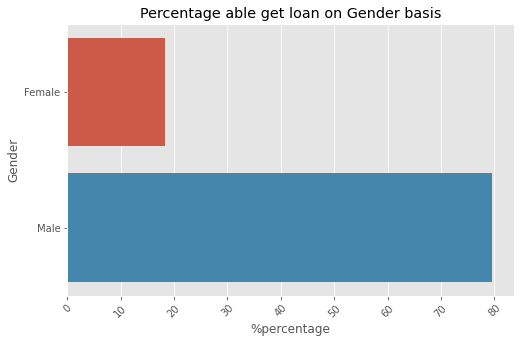

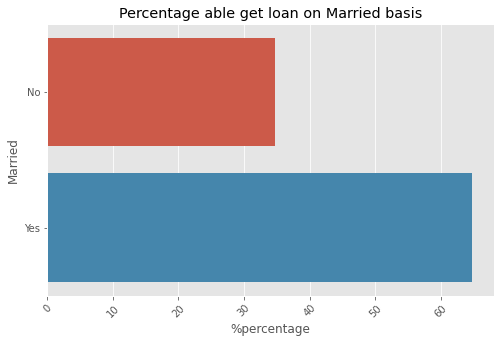

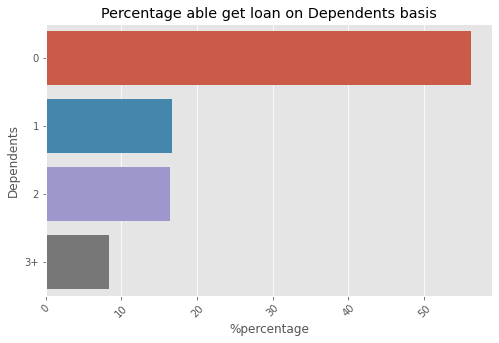

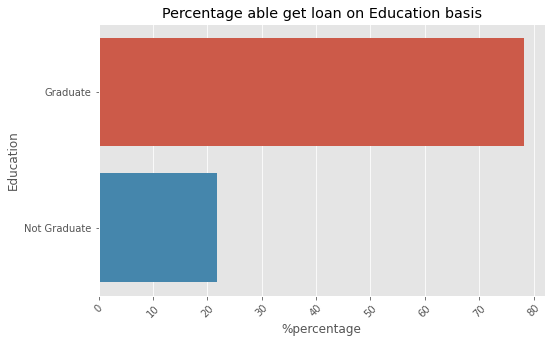

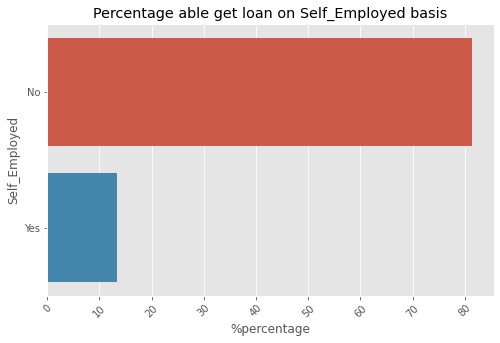

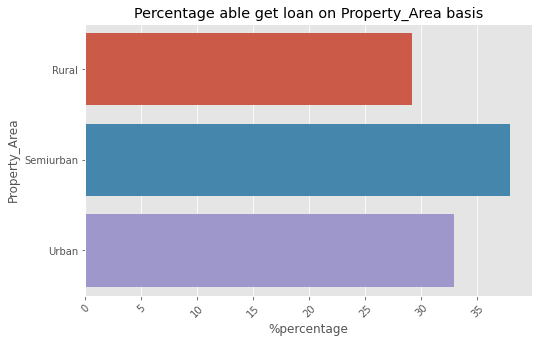

In [ ]:
for feature in cat_df:
  df=train.copy()
  plt.figure(figsize=(8,5))
  new=df.groupby(feature)['Loan_Status'].count()*100/len(df)
  sns.barplot(y=new.index,x=new.values)
  plt.xlabel('%percentage')
  plt.ylabel(feature)
  plt.title('Percentage able get loan on'+" "+feature+" "+'basis')
  plt.xticks(rotation=45)
  plt.show()

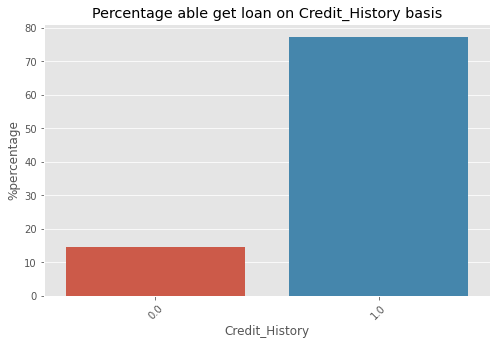

In [ ]:
for feature in discrete_df:
  df=train.copy()
  plt.figure(figsize=(8,5))
  new=df.groupby(feature)['Loan_Status'].count()*100/len(df)
  sns.barplot(x=new.index,y=new.values)
  plt.xlabel(feature)
  plt.ylabel('%percentage')
  plt.title('Percentage able get loan on'+" "+feature+" "+'basis')
  plt.xticks(rotation=45)
  plt.show()

**Bivariate Analysis with continuous variable and dependent variable:**

In [ ]:
num_df

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

<Figure size 720x360 with 0 Axes>

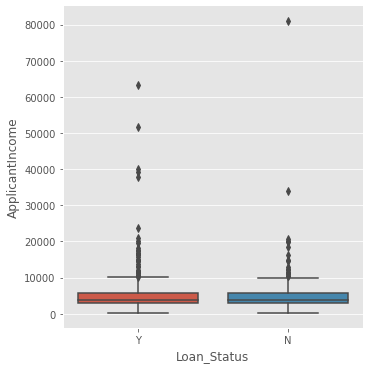

<Figure size 720x360 with 0 Axes>

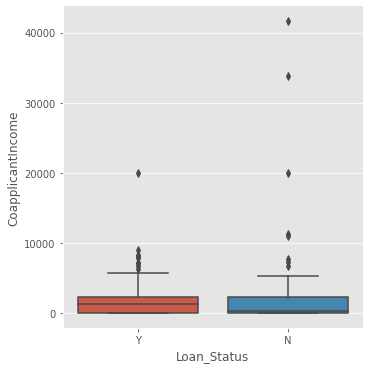

<Figure size 720x360 with 0 Axes>

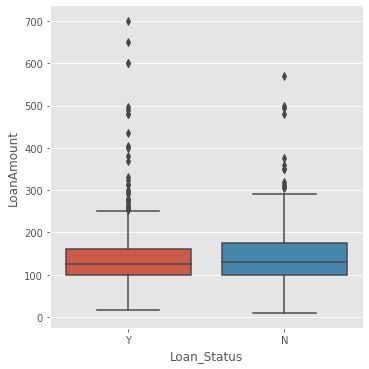

<Figure size 720x360 with 0 Axes>

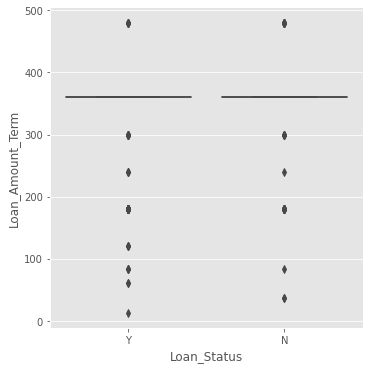

In [ ]:
for feature in num_df:
  df=train.copy()
  plt.figure(figsize=(10,5))
  sns.catplot(y=feature,x='Loan_Status',kind="box",data=df)

**Bivariate relationship correlation map:**

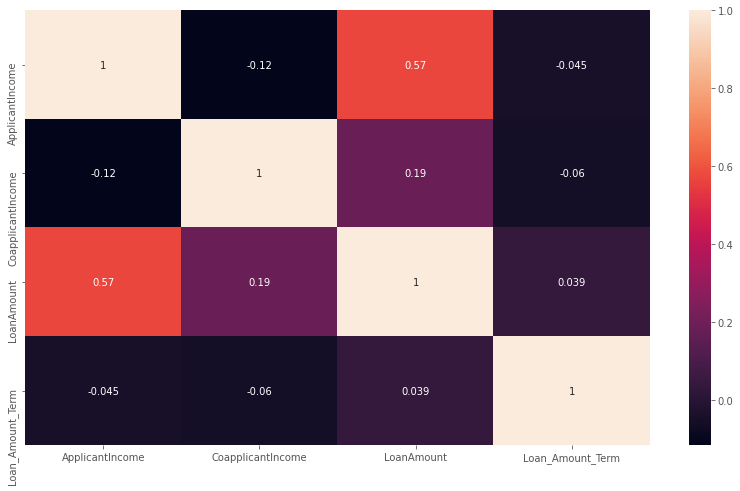

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_df].corr(), annot=True)

#**Feature Engineering:**

**Handling Missing Values for train and test data:**

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Handling categorical and discrete missing variable for train data:

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
#train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
#train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [ ]:
# Handling continuous variable missing variable for train data:

#train['LoanAmount']=train['LoanAmount'].fillna(train.groupby('Gender')['LoanAmount'].transform('median'))

train['LoanAmount'].fillna(method='bfill',inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
## Handling Missing value for categorical and discrete variable in test data:

test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
#test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
#test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)

In [ ]:
# Handling Missing values for continuous variable in test data:

#test['LoanAmount']=test['LoanAmount'].fillna(test.groupby('Gender')['LoanAmount'].transform('median'))
test['LoanAmount'].fillna(method='bfill',inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
test['Loan_Amount_Term'].unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [ ]:
def loan_term_process(x):
  if (x >= 1)and (x<= 60):
    return 'short_term'
  elif (x > 60) and (x <= 180):
    return 'mid_term'
  elif (x > 180) and (x <= 300):
    return 'long_term'
  elif (x > 300):
    return 'very_long_term'
  else:
    return 'Missing'

In [ ]:
def credit_term(x):
  if x==0:
    return 'bad_credit_history'
  elif x==1:
    return 'good_credit_history'
  else:
    return 'unknown'

**Binning Loan amount and credit history term in train and test data:**

In [ ]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].apply(loan_term_process)
train['Credit_History'] = train['Credit_History'].apply(credit_term)

In [ ]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].apply(loan_term_process)
test['Credit_History'] = test['Credit_History'].apply(credit_term)

**add new feature**

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [ ]:
#log transform for removing skewness and effect of outlier in train and test data:

train['ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
train['CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])
train['LoanAmount'] = np.log1p(train['LoanAmount'])
train['Total_Income'] = np.log1p(train['Total_Income'])

In [ ]:
test['ApplicantIncome'] = np.log1p(test['ApplicantIncome'])
test['CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])
test['LoanAmount'] = np.log1p(test['LoanAmount'])
test['Total_Income'] = np.log1p(test['Total_Income'])

**Convert target variable from categorical format into binary numerical format:**

In [ ]:
train['Loan_Status'] = train['Loan_Status'].map({'Y':1,'N':0})
train['Married'] = train['Married'].map({'Yes':1,'No':0})
train['Education'] = train['Education'].map({'Graduate':1,'Not Graduate':0})
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1,'No':0})
train['Dependents'] = train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [ ]:
test['Married'] = test['Married'].map({'Yes':1,'No':0})
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1,'No':0})
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,0,0,1,0,8.674197,0.000000,4.859812,very_long_term,good_credit_history,Urban,1,8.674197
1,LP001003,Male,1,1,1,0,8.430327,7.319202,4.859812,very_long_term,good_credit_history,Rural,0,8.714732
2,LP001005,Male,1,0,1,1,8.006701,0.000000,4.204693,very_long_term,good_credit_history,Urban,1,8.006701
3,LP001006,Male,1,0,0,0,7.857094,7.765993,4.795791,very_long_term,good_credit_history,Urban,1,8.505525
4,LP001008,Male,0,0,1,0,8.699681,0.000000,4.955827,very_long_term,good_credit_history,Urban,1,8.699681


**Combined train and test data to make new data set:**

In [ ]:
train["train_test"] = "train"
test['train_test'] = "test"
test["Loan_Status"] = np.NaN
all_data = pd.concat([train,test])

In [ ]:
all_data.shape

(981, 15)

In [ ]:
all_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'train_test'],
      dtype='object')

In [ ]:
cat_new = all_data[['Gender','Married','Dependents','Education',
       'Self_Employed', 'Credit_History', 'Property_Area']]

cat_new

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,0,0,1,0,good_credit_history,Urban
1,Male,1,1,1,0,good_credit_history,Rural
2,Male,1,0,1,1,good_credit_history,Urban
3,Male,1,0,0,0,good_credit_history,Urban
4,Male,0,0,1,0,good_credit_history,Urban
...,...,...,...,...,...,...,...
362,Male,1,3,0,1,good_credit_history,Urban
363,Male,1,0,1,0,good_credit_history,Urban
364,Male,0,0,1,0,unknown,Semiurban
365,Male,1,0,1,0,good_credit_history,Rural


In [ ]:
all_data.dtypes

Loan_ID               object
Gender                object
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status          float64
Total_Income         float64
train_test            object
dtype: object

**Dummy encoding nominal for categorical variables:**

In [ ]:
data_encoded = pd.get_dummies(all_data,columns = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term',
                                                  'Credit_History','Property_Area'],drop_first =True)

In [ ]:
data_encoded.shape

(981, 22)

In [ ]:
data_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Total_Income,train_test,Gender_Male,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_1,Self_Employed_1,Loan_Amount_Term_long_term,Loan_Amount_Term_mid_term,Loan_Amount_Term_short_term,Loan_Amount_Term_very_long_term,Credit_History_good_credit_history,Credit_History_unknown,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,8.674197,0.000000,4.859812,1.0,8.674197,train,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
1,LP001003,8.430327,7.319202,4.859812,0.0,8.714732,train,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0
2,LP001005,8.006701,0.000000,4.204693,1.0,8.006701,train,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1
3,LP001006,7.857094,7.765993,4.795791,1.0,8.505525,train,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1
4,LP001008,8.699681,0.000000,4.955827,1.0,8.699681,train,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1


**Split data into train and test set:**

In [ ]:
train_df= data_encoded[data_encoded['train_test'] == 'train']
test_df = data_encoded[data_encoded['train_test'] == 'test']

In [ ]:
print(train_df.shape)
print(test_df.shape)

(614, 22)
(367, 22)


In [ ]:
# Dropping unwanted cols from train and test data:

train_df.drop(['Loan_ID','train_test'],axis=1,inplace=True)
test_df.drop(['Loan_Status', 'train_test'],axis=1,inplace=True)

**Splitting train set into further dependent and independent set:**

In [ ]:
x= train_df.drop(['Loan_Status'],axis=1)
y = train_df['Loan_Status']

In [ ]:
print(x.shape)
print(y.shape)

(614, 19)
(614,)


In [ ]:
#Saving Loan_Id columns of test data:
loan_id = test_df['Loan_ID']

# removing the employee_id column

test_new = test_df.drop(['Loan_ID'], axis = 1)

print(test_new.shape)

(367, 19)


In [ ]:
#Robust scaling:
from sklearn.preprocessing import StandardScaler,RobustScaler

sc = StandardScaler()
x_new = sc.fit_transform(x)
x_test  = sc.transform(test_new)

In [ ]:
# splitting x and y into train and validation sets:

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_new, y, test_size = 0.20, random_state = 42)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (491, 19)
Shape of x_valid:  (123, 19)
Shape of y_train:  (491,)
Shape of y_valid:  (123,)


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
kf = KFold(n_splits=10,shuffle=True,random_state=12)

In [ ]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3= GradientBoostingClassifier()
clf4 = RandomForestClassifier()
clf5 = LGBMClassifier()
clf6 = xgb.XGBClassifier()
clf7 = BernoulliNB()



for clf,label in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7],
                     ['Logistic Regression','Decision Tree',
                      'Gradient Boosting','Random Forest',
                      'Light GBM','XGB','BernoulliNB']):
  scores = cross_val_score(clf,x_new,y,cv=kf,scoring='accuracy')
  print("F1-score: %0.2f (+/- %0.2f) [%s]"
        % (scores.mean(), scores.std(),label))

F1-score: 0.80 (+/- 0.05) [Logistic Regression]
F1-score: 0.71 (+/- 0.07) [Decision Tree]
F1-score: 0.78 (+/- 0.06) [Gradient Boosting]
F1-score: 0.78 (+/- 0.06) [Random Forest]
F1-score: 0.77 (+/- 0.05) [Light GBM]
F1-score: 0.79 (+/- 0.06) [XGB]
F1-score: 0.76 (+/- 0.05) [BernoulliNB]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

grid = {'penalty': ['none','l1','l2','elasticnet'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
        'class_weight' : ['balanced'],
        'C': [100, 10, 1.0, 0.1, 0.01,0.001]}

final_model = LogisticRegression()
log_grid = GridSearchCV(final_model,grid,cv=5,verbose=False)
log_grid.fit(x_train,y_train)
                                  

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'class_weight': ['balanced'],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs',

In [ ]:
log_grid.best_score_

0.7656565656565657

In [ ]:
log_grid.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict_valid = model.predict(x_valid)
model_score = accuracy_score(y_valid,predict_valid)
model_score

0.7886178861788617

In [ ]:
model_test_pred = model.predict(x_test)

In [ ]:
predictions = [int(round(value)) for value in model_test_pred]

In [ ]:
submission_log= pd.DataFrame({'Loan_ID': loan_id,'Loan_Status':predictions})

submission_log.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [ ]:
submission_log['Loan_Status'] = submission_xgb['Loan_Status'].map({1:'Y',0:'N'})

In [ ]:
submission_log.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
filename = 'submission_log.csv'
submission_log.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  submission_xgb.csv


In [ ]:
from google.colab import files
files.download('submission_log.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>